# Cart Abandonment - Prediction Analysis - Working Model

### Introduction 

Shopping cart abandonment refers to visitors who add things to their online shopping basket but leave before finishing the transaction.

Online consumers give up buying the visited/selected products that have been added to the cart, which forces e-commerce sites to incur potential losses.Most of the time no strategy is applied to predict customer behavior and actively engage them during their purchase journey.

Strategy-With machine learning, predicting whether a consumer would abandon their basket, we may provide specific offers to that customer, allowing them to successfully finish the checkout process before they abandon the cart thereby lowering the abandonment rate.

## About Artefact1:
This artefact is a working prototype of the cart abandonment prediction analysis. This artefact provides the prediction data on the cart abandonment behavior by the customer with their browsing details. This artefact allows a customer to engage with and view a working model of the machine learning approach.

# Using this artefact, we can predict whether a customer would abandon his cart or not.

In [1]:
#*****Predicting the cart abandonment behaviour of the customer - using Logistic Regression Method******

In [2]:
#Importing Dependencies
import pandas as pd
import seaborn as sns
import numpy as nmp
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
%matplotlib inline

# Dataset
Dataset collected from Kaggle on the ecommerce electronic sales data of the customer
The dataset contains 4284 columns and 13 features for which the model is built.
The data set (.csv format) is downloaded to a local folder, read into the Jupyter notebook and then stored in a Pandas DataFrame.

In [3]:
SampleRawData=pd.read_csv('data_cart_abandonment.csv')

In [4]:
#****Sample Data View *****#

In [5]:
SampleRawData.shape

(4284, 13)

In [6]:
SampleRawData.head()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


# Data Analysis
Following data collection, a variety of processes are used to investigate the information. The main purpose of this step is to improve your understanding of the data structure, perform preliminary preprocessing, clean the data and inconsistencies in the data(missing values).The main purpose of this step is to improve your understanding of the data structure, perform preliminary preprocessing, clean the data and inconsistencies in the data(missing values) Data filtering is a technique for removing any unwanted data

In [7]:
SampleRawData.Cart_Abandoned=pd.Categorical(SampleRawData.Cart_Abandoned)

In [8]:
SampleRawData.Cart_Abandoned.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [9]:
SampleRawData.Customer_Segment_Type=pd.Categorical(SampleRawData.Customer_Segment_Type)
SampleRawData.Customer_Segment_Type.dtypes

CategoricalDtype(categories=[0, 1, 2], ordered=False)

In [10]:
SampleRawData.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

#### Data Cleaning

In [11]:
SampleData1 = SampleRawData.copy()

In [12]:
#****Checking on the nulls****#

In [13]:
SampleData1.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [14]:
#**********Dropping Nulls***********#

In [15]:
SampleData=SampleData1.dropna()

In [16]:
SampleData.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

# Data Visualization
Using visualisation to evaluate data and communicate results in a clear and understandable manner with piecharts and bar graphs
Graph 1 : Percentage of Customers abandoned the cart in the dataset
Graph 2 : Percentage of Loyal,Target and Untargeted Customers
Graph 3 : Abandonment based on detail views

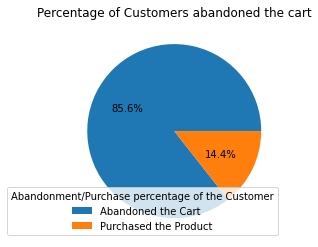

In [17]:
counts = SampleData['Cart_Abandoned'].value_counts()
counts
fig, ax = plt.subplots()
ax.pie(counts, autopct='%1.1f%%')
ax.legend(labels=['Abandoned the Cart', 'Purchased the Product'], title='Abandonment/Purchase percentage of the Customer',loc='lower right')
ax.set_title("Percentage of Customers abandoned the cart")
plt.show()

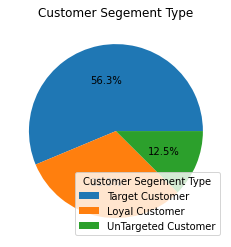

In [18]:
counts = SampleData['Customer_Segment_Type'].value_counts()
counts
fig, ax = plt.subplots()
ax.pie(counts, autopct='%1.1f%%')
ax.legend(labels=['Target Customer', 'Loyal Customer','UnTargeted Customer'], title='Customer Segement Type',loc='lower right')
ax.set_title("Customer Segement Type")
plt.show()

<AxesSubplot:xlabel='Is_Product_Details_viewed', ylabel='count'>

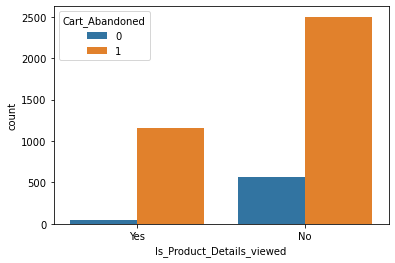

In [19]:
sns.countplot(x=SampleData.Is_Product_Details_viewed,hue=SampleData.Cart_Abandoned)

# Feature Engineering
One of the most significant activities in data analysis is feature engineering, which is the process of designing suitable features for machine learning models.To rescale features between 0 and 1, min-max scaling is applied.

In [20]:
num=SampleData.select_dtypes(include=["int64"])

In [21]:
Categ=SampleData.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [22]:
Categ.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
Categ.Is_Product_Details_viewed=pd.Categorical(Categ.Is_Product_Details_viewed)

In [23]:
Categ.describe

<bound method NDFrame.describe of      Is_Product_Details_viewed Customer_Segment_Type Cart_Abandoned
0                            1                     0              1
1                            0                     0              1
2                            0                     1              0
3                            0                     0              1
4                            1                     2              1
...                        ...                   ...            ...
4279                         1                     2              1
4280                         0                     0              1
4281                         0                     0              1
4282                         0                     1              1
4283                         0                     1              1

[4271 rows x 3 columns]>

In [24]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
#x_scaled.head(3)

In [25]:
ScaledData = pd.DataFrame(x_scaled,columns=num.columns)
ScaledData.head(3)

,Session_Activity_Count,No_Items_Removed_FromCart,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,0.009174,0.0,0.000000,0.000000,0.003906,0.0,0.000000
1,0.087156,0.0,0.000000,0.000000,0.007812,0.0,0.057143
2,0.018349,0.0,0.090909,0.071429,0.003906,0.0,0.000000


In [26]:
ScaledData1=ScaledData.join(Categ)
ScaledData1.head()

,Session_Activity_Count,No_Items_Removed_FromCart,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,0.009174,0.00,0.000000,0.000000,0.003906,0.0,0.000000,1,0,1
1,0.087156,0.00,0.000000,0.000000,0.007812,0.0,0.057143,0,0,1
2,0.018349,0.00,0.090909,0.071429,0.003906,0.0,0.000000,0,1,0
3,0.013761,0.00,0.000000,0.000000,0.015625,0.0,0.000000,0,0,1
4,0.071101,0.24,0.000000,0.000000,0.015625,0.0,0.000000,1,2,1


In [27]:
#ScaledData1.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
#ScaledData1.Is_Product_Details_viewed=pd.Categorical(ScaledData1.Is_Product_Details_viewed)

In [28]:
ScaledData2=ScaledData1.dropna()

# Train and Test Data
The train test split technique is used for classification and regression problems to test the machine learning algorithms. 
The data is split into 80% training data and 20% testing data.

In [29]:
Y = ScaledData2['Cart_Abandoned']
X = ScaledData2.drop('Cart_Abandoned',axis='columns')

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [30]:
X_train.shape

(3406, 9)

In [31]:
X_test.shape

(852, 9)

# Prediction Model
Applied the Logistic Regression as the initial experimetation.

In [32]:

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
logmodel_accuracy_score=logmodel.score(X_test,Y_test)

print ('LOGISTIC REGRESSION')
print ('===================')
print ('Accuracy Score is', logmodel_accuracy_score)
print ('-----')

LOGISTIC REGRESSION
Accuracy Score is 0.857981220657277
-----


In [33]:
#With the Logistic Regression Model we are getting the data accuracy as 0.85 

In [34]:
#Prediction Results column --> 0 Denotes 'Going to Purchase' 1 Denotes 'Going to Abandon'

In [35]:
Y_train.head

<bound method NDFrame.head of 2280    0
2781    1
752     1
2820    1
1869    1
       ..
3059    1
1738    1
4092    1
2267    0
2928    0
Name: Cart_Abandoned, Length: 3406, dtype: category
Categories (2, int64): [0, 1]>

# Future Enhancements

Enhancement 1: Use of other algorithms and compare the accuracy score
Enhancement 2: Applying the mean for the null instead of dropping.
Enhacement  3: Tuning the feature engineering part to derive more accuracy.
Enhancement 4: Applying Performace metrics to determine the efficiency of the model.